## Desarrollo Guia_2
* Integrantes
    * 1. Yeison Andres Baron Lopez

Para el desarrollo de la GUia. se tomaron en cuenta los datos de la base VIno Blanco y Vino Rojo o Tinto;
la cual se desarroolla desde la combinacion de ambas bases con nueva variable del tipo de vino y coomo variable dependiente la calidad del vino

In [46]:
!poetry add scikit-learn 

The following packages are already present in the pyproject.toml and will be skipped:

  - scikit-learn

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


In [47]:
## Carga de datos

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df_w = pd.read_csv(r'E:\OneDrive - Banco Agrario de Colombia S.A\Escritorio\Python\EAN\Machine learning\Guia_2\Datos\winequality-white.csv', sep=';', encoding='latin-1')
df_r = pd.read_csv(r'E:\OneDrive - Banco Agrario de Colombia S.A\Escritorio\Python\EAN\Machine learning\Guia_2\Datos\winequality-red.csv', sep=';', encoding='latin-1')

# Añadir una columna para identificar el tipo de vino con valores 1 para blanco y 2 para tinto
df_w['Tipo de Vino'] = 1
df_r['Tipo de Vino'] = 2

# Unir las dos bases de datos
df_combined = pd.concat([df_w, df_r], ignore_index=True)

# Verifica que los datos se hayan unido correctamente
print(df_combined.head())
print(df_combined.tail())
# Mostrar las primeras filas
display(df_combined.head())




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  Tipo de Vino  
0      8.8        6             1  
1      9.5    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo de Vino
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [48]:
# Obtener los valores únicos en la columna 'quality'
unique_values = df_combined['quality'].unique()

# Imprimir los valores únicos
print(f"Unique values in the 'quality' column: {unique_values}")

Unique values in the 'quality' column: [6 5 7 8 4 3 9]


Al tener los valores unicos, podemos ver que las calidades varian desde el 3 al 9, entndiendo el 9 como nivel max o alto de la variable

In [49]:
# Asignar 1 a las clases superiores o iguales a 7 y 0 a las clases inferiores a 7
df_combined['quality'] = df_combined['quality'].apply(lambda x: 1 if x >= 7 else 0)

En el anterior codigo; definimos la calidad en baja ò 0 si es menor o igual a 6 y 1 si es alta o mayor igual que 7

In [50]:
display(df_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  Tipo de Vino          6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


None

In [51]:
display(df_combined.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Tipo de Vino            0
dtype: int64

In [52]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [53]:
# Obtener las métricas descriptivas para cada tipo de vino
metrics_white = df_combined[df_combined['Tipo de Vino'] == 1].describe()
metrics_red = df_combined[df_combined['Tipo de Vino'] == 2].describe()



In [54]:

print("Métricas descriptivas para el vino tinto:")
print(metrics_red)

Métricas descriptivas para el vino tinto:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min   

## Con la variable calidad del vino Tinto, se clasificara y se entrenara el modelo
*0-6:  Baja Calidad
*7-10: Alta calidad

In [55]:

# Para el vino tinto (Tipo de Vino=2)
df_red = df_combined[df_combined['Tipo de Vino'] == 2]
X_red = df_red.drop(columns=['quality', 'Tipo de Vino'])
y_red = df_red['quality']

In [56]:
X = df_combined.drop('quality',axis=1) 
y=df_combined['quality']
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state=100)

In [57]:
scaler_red = StandardScaler()
X_train_red = scaler_red.fit_transform(X_train_red)
X_test_red = scaler_red.transform(X_test_red)

# Crear el pipeline con StandardScaler y LogisticRegression
Pipeline_red = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

Pipeline_red

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [58]:
X_train_red

array([[ 1.9404823 , -1.40893624,  1.01909277, ..., -1.01278988,
         0.08253001,  0.19784958],
       [ 0.15795998, -0.36064685,  1.01909277, ..., -1.45784924,
        -1.18835636, -0.84474641],
       [ 0.33046214, -0.30547373, -0.1455265 , ..., -1.33068943,
        -0.76472757, -1.12909078],
       ...,
       [-0.01454218,  0.4945366 , -0.34806898, ..., -0.94920997,
         2.80585793, -1.22387223],
       [-0.70455083,  0.41177691, -1.25951015, ...,  1.08534711,
        -0.34109878, -0.65518351],
       [ 0.04295854, -0.91237811,  0.81655029, ..., -0.88563006,
         0.92978758,  0.7665383 ]])

In [59]:
X_test_red

array([[-0.30204578,  0.90833504, -1.05696767, ...,  0.57670784,
         0.2035668 ,  0.48219394],
       [-0.24454506, -1.90549437,  0.76591467, ..., -0.12267116,
         0.2035668 ,  0.7665383 ],
       [-0.93455371,  0.02556503, -0.70251833, ...,  1.91188593,
        -0.09902519, -0.56040205],
       ...,
       [ 0.56046502, -0.69168561,  0.61400781, ..., -0.31341088,
        -0.03850679, -0.18127624],
       [-1.33705875, -1.13307061,  0.25955846, ..., -0.05909125,
        -0.58317238,  1.05088267],
       [-0.53204867,  0.90833504, -1.36078139, ...,  1.27608684,
        -0.58317238, -0.93952787]])

In [60]:
#entrenamiento del modelo
Pipeline_red.fit(X_train_red, y_train_red)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [61]:
#evaluamos el modelo
y_test_red_pred = Pipeline_red.predict(X_test_red)

In [62]:
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cm = confusion_matrix(y_test_red, y_test_red_pred)

print(cm)

[[395  22]
 [ 37  26]]


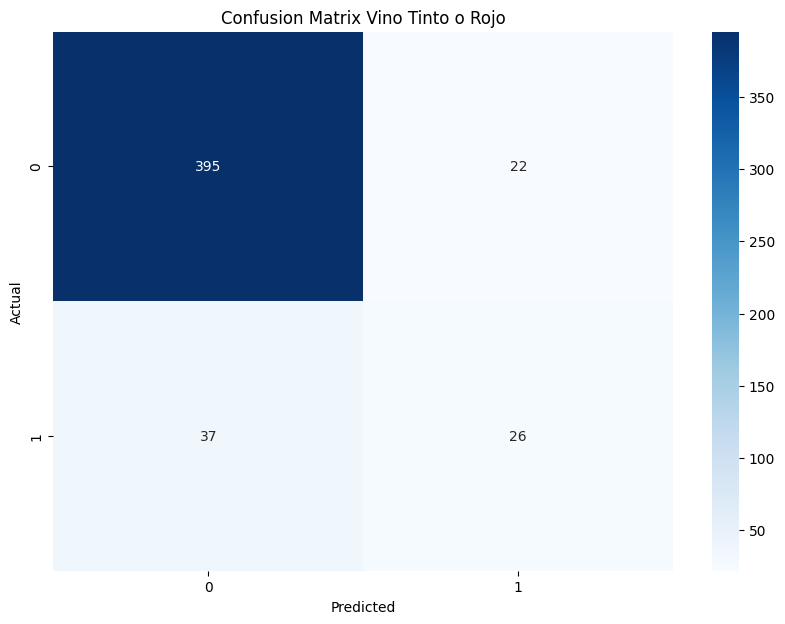

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Vino Tinto o Rojo')  # Agregar título
plt.show()

In [64]:
#estadistico de validacion 
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test_red,y_test_red_pred)
exactitud

0.8770833333333333

In [65]:
#precision
from sklearn.metrics import precision_score

precision = precision_score (y_test_red, y_test_red_pred)
precision


np.float64(0.5416666666666666)

In [66]:
#Sensibilidad (Recall) o Tasa de Verdaderos Positivos
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test_red, y_test_red_pred)
print(f"Sensibilidad: {sensibilidad}")



Sensibilidad: 0.4126984126984127


In [67]:
from sklearn.metrics import recall_score # eficiencia encontrando 1, que no se idenetificaron
sensibilidad = recall_score(y_test_red,y_test_red_pred)
sensibilidad

np.float64(0.4126984126984127)

In [68]:
from sklearn.metrics import f1_score #promedido armonico
f1 = f1_score (y_test_red,y_test_red_pred)
print(f"Valor F1: {f1}")

Valor F1: 0.46846846846846846


In [69]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
report = classification_report(y_test_red, y_test_red_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       417
           1       0.54      0.41      0.47        63

    accuracy                           0.88       480
   macro avg       0.73      0.68      0.70       480
weighted avg       0.87      0.88      0.87       480



In [70]:
y_test_red_pred_proba= Pipeline_red.predict_proba(X_test_red)
y_test_red_pred_proba

array([[0.94487274, 0.05512726],
       [0.52279941, 0.47720059],
       [0.98126498, 0.01873502],
       [0.99356755, 0.00643245],
       [0.95093631, 0.04906369],
       [0.21806395, 0.78193605],
       [0.99582605, 0.00417395],
       [0.88943274, 0.11056726],
       [0.79182985, 0.20817015],
       [0.41950242, 0.58049758],
       [0.30057321, 0.69942679],
       [0.98978387, 0.01021613],
       [0.95962533, 0.04037467],
       [0.99166203, 0.00833797],
       [0.93617957, 0.06382043],
       [0.9976427 , 0.0023573 ],
       [0.66253127, 0.33746873],
       [0.99189221, 0.00810779],
       [0.97660963, 0.02339037],
       [0.97876724, 0.02123276],
       [0.8650075 , 0.1349925 ],
       [0.98316613, 0.01683387],
       [0.93376049, 0.06623951],
       [0.81682709, 0.18317291],
       [0.57580334, 0.42419666],
       [0.65634392, 0.34365608],
       [0.79330158, 0.20669842],
       [0.98614098, 0.01385902],
       [0.97622909, 0.02377091],
       [0.94509547, 0.05490453],
       [0.

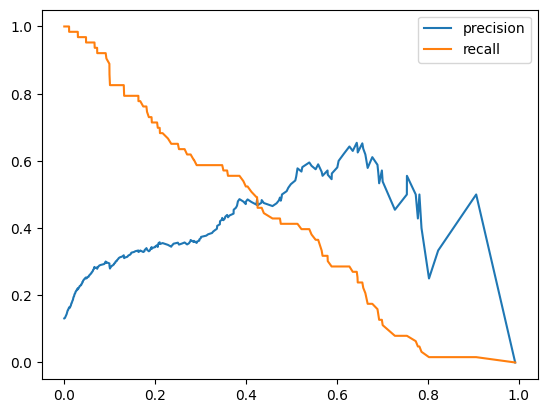

In [71]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve (y_test_red, y_test_red_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot (thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall [:-1],label='recall')
plt.legend ()
plt.show()

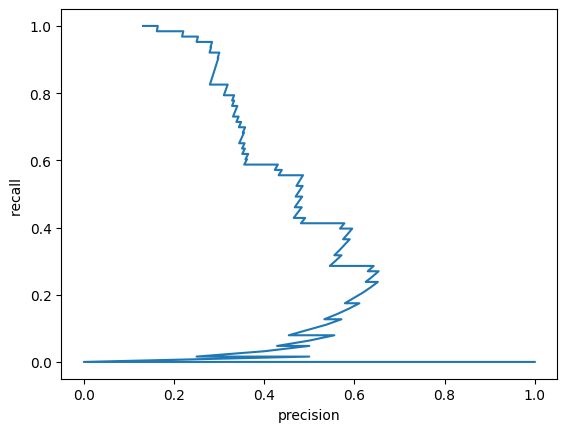

In [72]:
precision,recall,thresholds=precision_recall_curve(y_test_red,y_test_red_pred_proba[:,1])

plt.plot(precision,recall)
plt.xlabel('precision')
plt.ylabel('recall ')
plt.show()

In [73]:
print("Métricas descriptivas para el vino blanco:")
print(metrics_white)

Métricas descriptivas para el vino blanco:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min  

## Con la variable calidad del Vino Blanco, se clasificara y se entrenara el modelo
*0-6:  Baja Calidad
*7-10: Alta calidad

In [74]:

# Para el vino tinto (Tipo de Vino=1)
df_white = df_combined[df_combined['Tipo de Vino'] == 1]
x_white = df_white.drop(columns=['quality', 'Tipo de Vino'])
y_white = df_white['quality']

In [75]:
x = df_combined.drop('quality',axis=1) 
y=df_combined['quality']
x_train_white, x_test_white, y_train_white, y_test_white = train_test_split(x_white, y_white, test_size=0.3, random_state=100)

In [76]:
scaler_white = StandardScaler()
x_train_white = scaler_white.fit_transform(x_train_white)
x_test_white = scaler_white.transform(x_test_white)

# Crear el pipeline con StandardScaler y LogisticRegression
Pipeline_white = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

Pipeline_white

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [77]:
x_train_white    

array([[ 0.42086174, -0.67161681,  0.314419  , ..., -0.18754497,
        -0.08108681,  0.31293898],
       [-1.3815545 , -1.2618877 , -0.44402158, ...,  0.2084539 ,
        -1.92774211,  0.55630993],
       [ 0.18053957, -0.08134592,  1.24140193, ...,  0.07645428,
         0.09478512, -0.90391578],
       ...,
       [-0.66058801, -1.55702314,  0.23014782, ...,  0.53845296,
         2.20524832,  0.71855723],
       [-0.17994368,  2.57487309, -0.44402158, ...,  0.53845296,
        -1.04838245, -1.22841038],
       [-0.42026584, -0.57323833, -0.19120805, ..., -0.25354479,
        -1.57599825,  0.79968088]])

In [78]:
x_test_white

array([[ 0.30070066, -1.16350922,  0.23014782, ..., -0.18754497,
        -0.43283068,  0.31293898],
       [ 2.46360015,  0.41054649,  1.3256731 , ..., -0.38554441,
        -1.31219035, -0.90391578],
       [-0.66058801,  0.01703256,  1.15713075, ..., -0.45154422,
         0.18272109, -0.82279213],
       ...,
       [ 1.62247257,  0.60730345,  1.3256731 , ..., -0.71554347,
         0.27065706,  0.15069168],
       [-1.86219884, -0.03215668, -0.78110628, ...,  1.2644509 ,
         0.18272109,  0.39406263],
       [ 0.30070066,  0.50892497,  2.58974073, ..., -0.91354291,
        -0.87251051, -1.06616308]])

In [79]:
#entrenamiento del modelo
Pipeline_white.fit(x_train_white, y_train_white)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [80]:
#evaluamos el modelo
y_test_white_pred= Pipeline_white.predict(x_test_white)


In [81]:
from sklearn.metrics import confusion_matrix

# Generar la matriz de confusión
cmw = confusion_matrix(y_test_white, y_test_white_pred)

print(cmw)

[[1088   67]
 [ 231   84]]


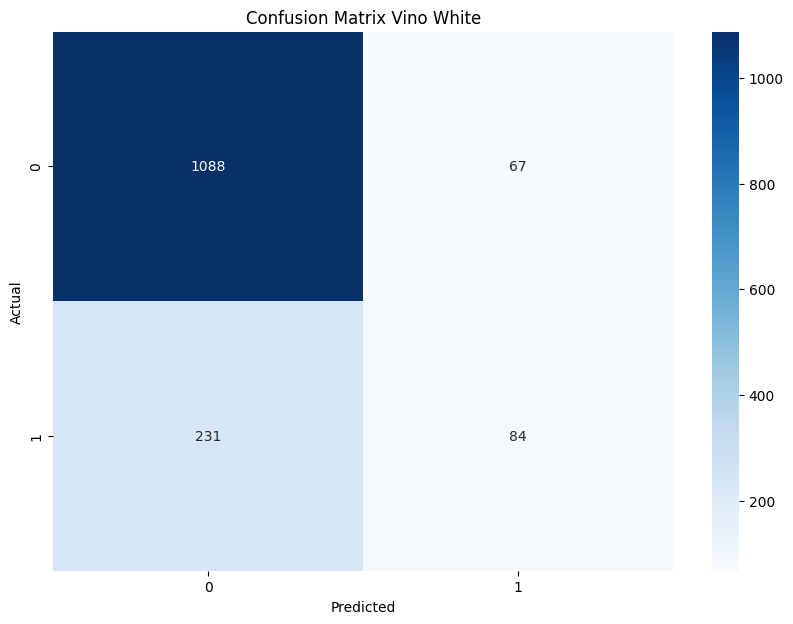

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cmw, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Vino White') 
plt.show()

In [83]:
#estadistico de validacion 
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test_white,y_test_white_pred)
exactitud

0.7972789115646258

In [84]:
#precision
from sklearn.metrics import precision_score

precision = precision_score (y_test_white, y_test_white_pred)
precision


np.float64(0.5562913907284768)

In [85]:
#Sensibilidad (Recall) o Tasa de Verdaderos Positivos
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test_white, y_test_white_pred)
print(f"Sensibilidad: {sensibilidad}")

Sensibilidad: 0.26666666666666666


In [86]:
from sklearn.metrics import f1_score #promedido armonico
f1 = f1_score (y_test_white,y_test_white_pred)
print(f"Valor F1: {f1}")

Valor F1: 0.3605150214592275


In [87]:
from sklearn.metrics import classification_report

# Generar el reporte de clasificación
report = classification_report(y_test_white, y_test_white_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      1155
           1       0.56      0.27      0.36       315

    accuracy                           0.80      1470
   macro avg       0.69      0.60      0.62      1470
weighted avg       0.77      0.80      0.77      1470



In [89]:
y_test_white_pred_proba= Pipeline_white.predict_proba(x_test_white)
y_test_white_pred_proba

array([[0.79624039, 0.20375961],
       [0.98357337, 0.01642663],
       [0.88407819, 0.11592181],
       ...,
       [0.89463635, 0.10536365],
       [0.70496244, 0.29503756],
       [0.96499685, 0.03500315]])

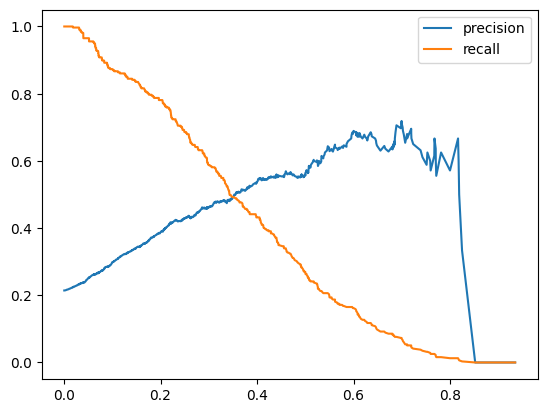

In [90]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve (y_test_white, y_test_white_pred_proba[:,1])
import matplotlib.pyplot as plt
plt.plot (thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall [:-1],label='recall')
plt.legend ()
plt.show()

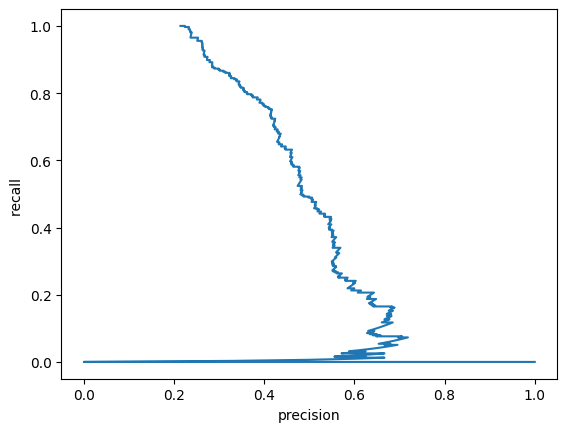

In [91]:
precision,recall,thresholds=precision_recall_curve(y_test_white,y_test_white_pred_proba[:,1])

plt.plot(precision,recall)
plt.xlabel('precision')
plt.ylabel('recall ')
plt.show()